In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [3]:
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

In [4]:
#Create labels to be human-readable

human_readable_label = ['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'
                       ]

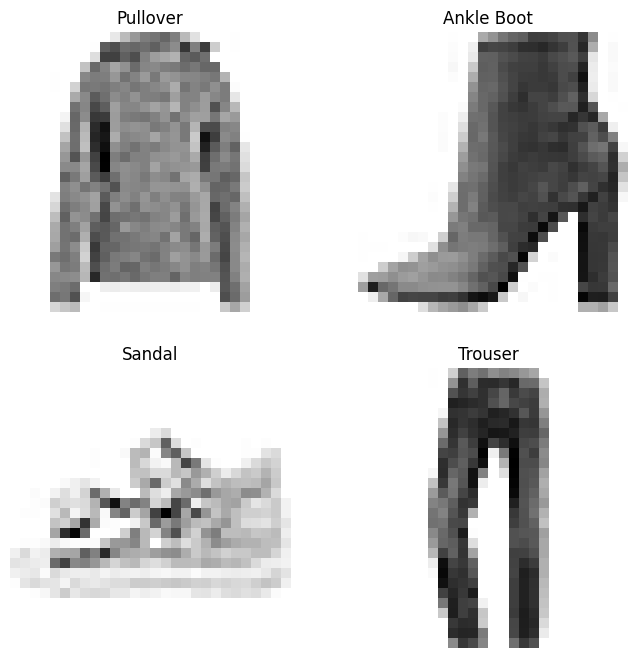

In [5]:


plt.figure(figsize=(8,8))

for i in range(4):
    random_index = np.random.randint(0, 60001)
    plt.subplot(2, 2, i+1)
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(human_readable_label[train_label[random_index]])
    plt.axis(False)

In [55]:
#Set random seed
tf.random.set_seed(42)


#Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


#Create callback for learning rate schudule
#lr_sc = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10**(epochs/20))

#Fit Model
history = model.fit(train_data_norm, train_label, epochs=40, validation_data=(test_data_norm, test_label))

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5296 - accuracy: 0.8116 - val_loss: 0.4296 - val_accuracy: 0.8421
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.8606 - val_loss: 0.4440 - val_accuracy: 0.8469
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3472 - accuracy: 0.8740 - val_loss: 0.3869 - val_accuracy: 0.8590
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3266 - accuracy: 0.8796 - val_loss: 0.3818 - val_accuracy: 0.8633
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3102 - accuracy: 0.8848 - val_loss: 0.3676 - val_accuracy: 0.8648
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2968 - accuracy: 0.8886 - val_loss: 0.3780 - val_accuracy: 0.8576
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2864 - accuracy: 0.8931 - val_loss: 0.3902 - val_accuracy:

<Axes: >

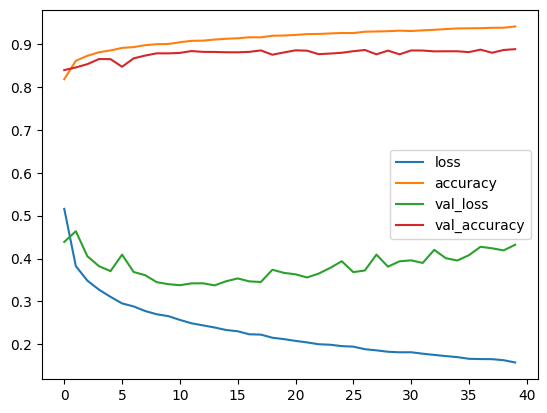

In [25]:
pd.DataFrame(history.history).plot()

In [26]:
model.evaluate(test_data_norm, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8880


[0.4322879910469055, 0.8880000114440918]

In [27]:
y_pred = model.predict(test_data_norm)

313/313 [==============================] - 1s 1ms/step


In [31]:
y_pred = y_pred.argmax(axis=1)

In [44]:

def create_confusion_matrix(y_true, y_preds, classes=None, figsize=(10,10), text_size=30):
    
    #Create confusion matrix

    cm = confusion_matrix(y_true, y_preds)

    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  #normalizes the confusion matrix to give percentages

    #Set number of classes 

    n_classes = cm.shape[0]


    #Make confusion matrix nicer
    fig, ax = plt.subplots(figsize=figsize)

    #Create matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Create classes

    if classes:
        labels = classes

    else:
        labels = np.arange(cm.shape[0])


    # Label Axes
    ax.set(title='Confusion Matrix',
           xlabel='Prediction',
           ylabel='True',
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels
          )
    
    #Set x-axis label to the bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()
    
    #Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    



    #Set threshold for different colors

    threshold = (cm.max() + cm.min()) / 2.


    #Plot Text
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, f"{cm[i,j]} ({cm_normalized[i,j]*100: .1f}%)", horizontalalignment='center',
                color='white' if cm[i,j] > threshold else 'black', size=text_size)


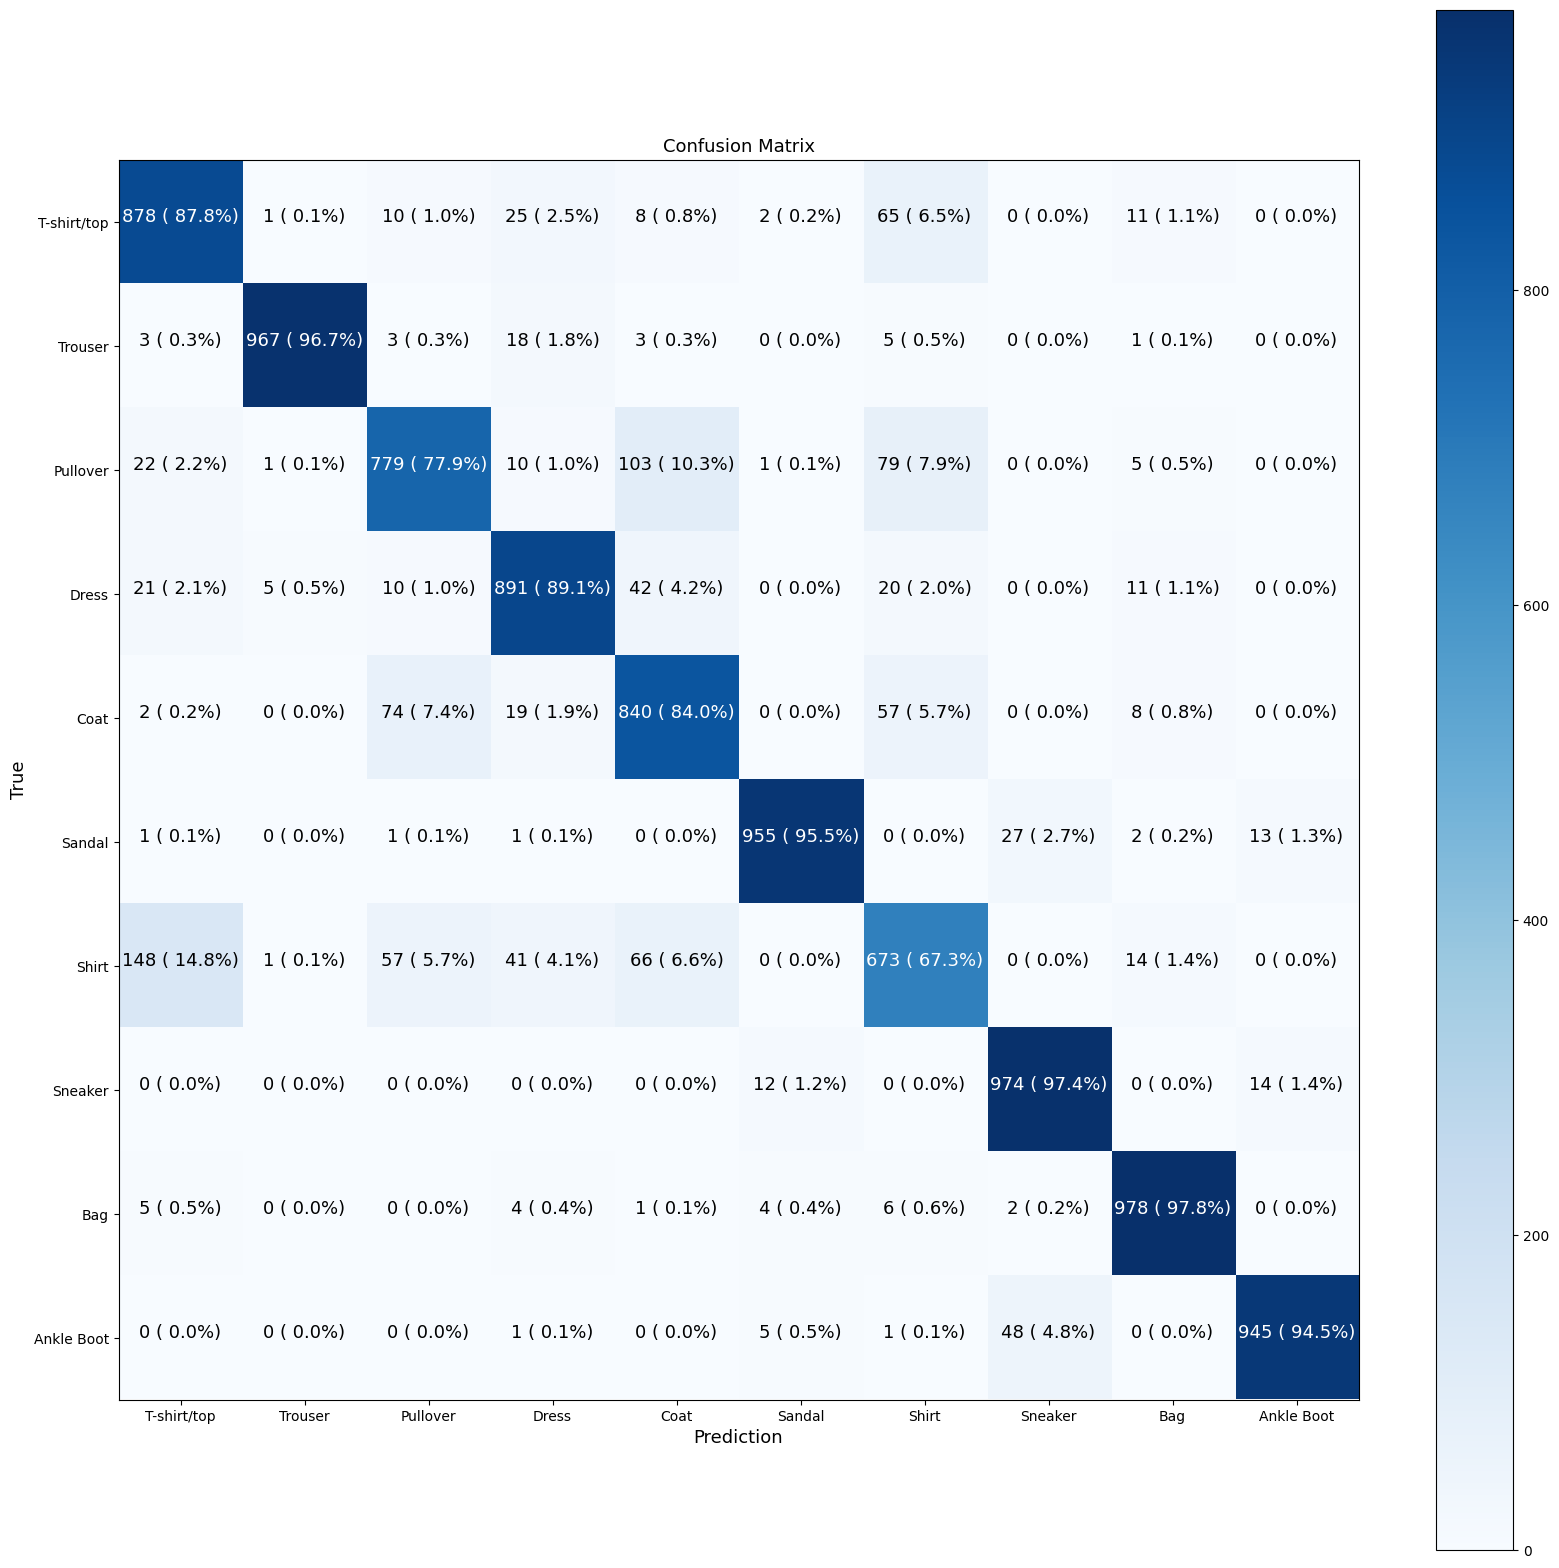

In [61]:
create_confusion_matrix(y_true=test_label, y_preds=y_pred, classes=human_readable_label, figsize=(20,20), text_size=13)

In [70]:
def visualize_image(model, image, true_labels, classes):
    
    """
    Plots a random image and shows its true label and predictions

    """
   
    
    #Set random integer
    i = np.random.randint(0, len(image))
    
    
    # Create target images and predictions
    target_image = image[i]
    
    prediction_probabilities = model.predict(target_image.reshape(1, 28, 28))
    
    #Set labels for true labels and prediction
    pred_labels = classes[prediction_probabilities.argmax()]
    
    true_labels = classes[true_labels[i]]
    
    
    #plot image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    #Set label color change based on whether predictions are right or wrong
    if pred_labels == true_labels:
        color='green'
    else:
        color='red'
        
    
    # Update xlabel information
    plt.xlabel('Prediction: {} {:2.0f}%  (True: {})'.format(pred_labels, 100*tf.reduce_max(prediction_probabilities), 
                                                            true_labels), color=color)

1/1 [==============================] - 0s 20ms/step


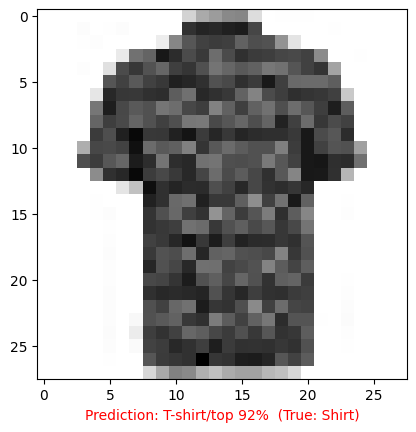

In [90]:
visualize_image(model=model, image=test_data_norm, true_labels=test_label, classes=human_readable_label)